In [4]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import seaborn as sns

In [5]:
#Cargamos base de datos
df = pd.read_csv('Mexico_Limpio.csv')

In [6]:
#Verificamos valores nulos 
df.isnull().sum().sum()

np.int64(0)

In [9]:
# Seleccionar solo columnas numéricas para hacer las tablas de correlación
num_cols = df.select_dtypes(include=np.number).columns

Bloque 1 'host_response_rate'

In [51]:
# Correlación de la variable objetivo con todas las numéricas
corr_review = df[num_cols].corrwith(df['host_response_rate']).sort_values(ascending=False)
print('Variables con mayor correlación:', corr_review.head())
#print('Variables con menor correlación:', corr_review.tail())

Variables con mayor correlación: host_response_rate           1.000000
host_acceptance_rate         0.505040
host_is_superhost            0.307840
estimated_occupancy_l365d    0.300256
number_of_reviews_ltm        0.281076
dtype: float64


Primeras 10 predicciones: [0.96292273 0.96292273 0.96292273 0.96292273 0.99064027 0.96292273
 0.99064027 0.99064027 0.99064027 0.99064027]


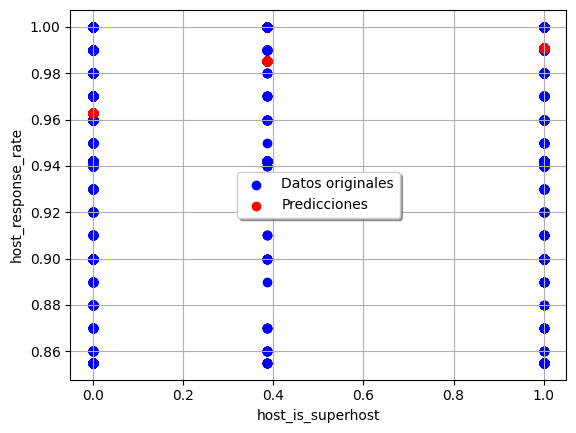

Coeficientes del modelo (a, b, c): [-0.04840146  0.07611899  0.96292273]
R2 del modelo: 0.09829230069174966
R (correlación) del modelo: 0.31351602940160755


In [47]:
#MODELO 1
# Variables independientes y dependiente
x = df['host_is_superhost'].values
y = df['host_response_rate'].values

# Definimos la función cuadrática
def func1(x, a, b, c):
    return a*x**2 + b*x + c

# Ajustamos los parámetros de la función
parametros1, covs = curve_fit(func1, x, y)


# Realizamos las predicciones
y_pred1 = func1(x, *parametros1)

# Mostramos las primeras predicciones
print("Primeras 10 predicciones:", y_pred1[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred1, color='red', label="Predicciones")
plt.xlabel('host_is_superhost')
plt.ylabel('host_response_rate')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros1)

# Calculamos el coeficiente de determinación y correlación
R2_Modelo1 = r2_score(y, y_pred1)
R_Modelo1 = np.sqrt(R2_Modelo1)

print("R2 del modelo:", R2_Modelo1)
print("R (correlación) del modelo:", R_Modelo1)


Coeficientes del modelo (a, b, c): [ 0.22241074 -0.01484403  0.21018538]
Primeras 10 predicciones: [0.96871072 0.97288086 0.98754114 0.92243654 0.96041585 0.96871072
 0.97650954 0.96267586 0.98754114 0.98754114]


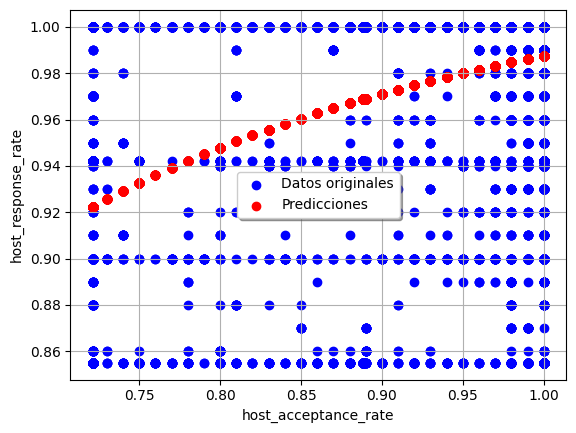

R² del modelo: 0.24127643027106083
R (correlación) del modelo: 0.4911989721803791


In [48]:
#MODELO 2
# Variables independientes y dependiente
x = df['host_acceptance_rate'].values
y = df['host_response_rate'].values

# Definimos la función correctamente
def func2(x, a, b, c):
    return (a*x**2 + b) / (c*x**2)

# Ajustamos los parámetros de la función
parametros2, covs2 = curve_fit(func2, x, y)

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros2)

# Realizamos las predicciones
y_pred2 = func2(x, *parametros2)
print("Primeras 10 predicciones:", y_pred2[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred2, color='red', label="Predicciones")
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación y correlación
R2_Modelo2 = r2_score(y, y_pred2)
R_Modelo2 = np.sqrt(abs(R2_Modelo2))  # usamos abs por si R² es negativo

print("R² del modelo:", R2_Modelo2)
print("R (correlación) del modelo:", R_Modelo2)

Bloque 2 'host_acceptance_rate'

In [50]:
# Correlación de la variable objetivo con todas las numéricas
corr_review = df[num_cols].corrwith(df['host_acceptance_rate']).sort_values(ascending=False)
print('Variables con mayor correlación:', corr_review.head())
#print('Variables con menor correlación:', corr_review.tail(5))

Variables con mayor correlación: host_acceptance_rate         1.000000
host_response_rate           0.505040
estimated_occupancy_l365d    0.372542
number_of_reviews_ltm        0.356422
number_of_reviews_ly         0.318600
dtype: float64


Primeras 10 predicciones: [0.8894821  0.89537474 0.91708843 0.89537474 0.93142399 0.8894821
 0.9858099  0.95278308 0.93583114 0.8894821 ]


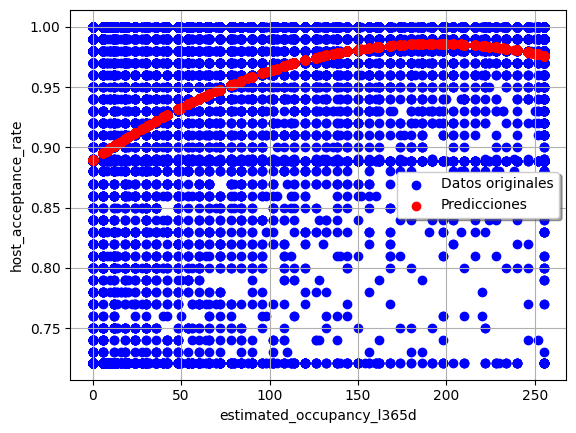

Coeficientes del modelo (a, b, c): [-2.57897057e-06  9.97579880e-04  8.89482104e-01]
R2 del modelo: 0.1671257832007157
R (correlación) del modelo: 0.40881020437449417


In [58]:
#MODELO 1
# Variables independientes y dependiente
x = df['estimated_occupancy_l365d'].values
y = df['host_acceptance_rate'].values

# Definimos la función cuadrática
def func1(x, a, b, c):
    return a*x**2 + b*x + c

# Ajustamos los parámetros de la función
parametros1, covs = curve_fit(func1, x, y)


# Realizamos las predicciones
y_pred1 = func1(x, *parametros1)

# Mostramos las primeras predicciones
print("Primeras 10 predicciones:", y_pred1[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred1, color='red', label="Predicciones")
plt.xlabel('estimated_occupancy_l365d')
plt.ylabel('host_acceptance_rate')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros1)

# Calculamos el coeficiente de determinación y correlación
R2_Modelo1 = r2_score(y, y_pred1)
R_Modelo1 = np.sqrt(R2_Modelo1)

print("R2 del modelo:", R2_Modelo1)
print("R (correlación) del modelo:", R_Modelo1)

Coeficientes del modelo (a, b, c): [ 1.91862610e+02 -2.68201688e-03  2.05163912e+02]
Primeras 10 predicciones: [0.93516344 0.93508149 0.9351107  0.93502219 0.93514752 0.93516344
 0.93516488 0.93514935 0.93507195 0.93513343]


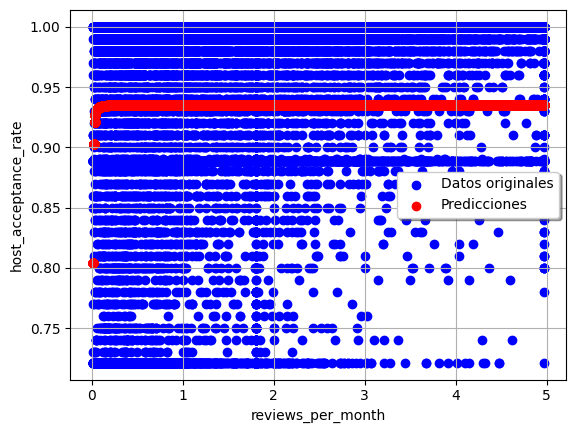

R² del modelo: 0.009356341651277522
R (correlación) del modelo: 0.0967281843687636


In [59]:
#MODELO 2
# Variables independientes y dependiente
x = df['reviews_per_month'].values
y = df['host_acceptance_rate'].values

# Definimos la función correctamente
def func2(x, a, b, c):
    return (a*x**2 + b) / (c*x**2)

# Ajustamos los parámetros de la función
parametros2, covs2 = curve_fit(func2, x, y)

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros2)

# Realizamos las predicciones
y_pred2 = func2(x, *parametros2)
print("Primeras 10 predicciones:", y_pred2[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred2, color='red', label="Predicciones")
plt.xlabel('reviews_per_month')
plt.ylabel('host_acceptance_rate')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación y correlación
R2_Modelo2 = r2_score(y, y_pred2)
R_Modelo2 = np.sqrt(abs(R2_Modelo2))  # usamos abs por si R² es negativo

print("R² del modelo:", R2_Modelo2)
print("R (correlación) del modelo:", R_Modelo2)

Bloque 3 'host_total_listings_count'

In [60]:
# Correlación de la variable objetivo con todas las numéricas
corr_review = df[num_cols].corrwith(df['host_total_listings_count']).sort_values(ascending=False)
print('Variables con mayor correlación:', corr_review.head())
#print('Variables con menor correlación:', corr_review.tail())

Variables con mayor correlación: host_total_listings_count                       1.000000
host_listings_count                             0.977708
calculated_host_listings_count                  0.876623
calculated_host_listings_count_entire_homes     0.714653
calculated_host_listings_count_private_rooms    0.183498
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Primeras 10 predicciones: [ 9.71945482 10.60363084 16.25456547  8.94332043  8.58000003  9.71945482
 11.58815826  8.82040189 16.25456547 16.25456547]


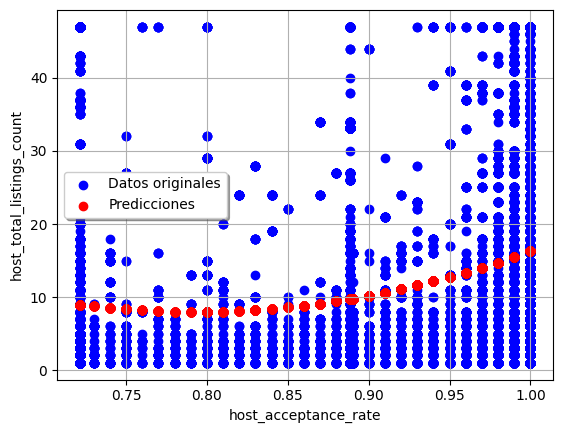

Coeficientes del modelo (a, b, c): [ 193.73988222 -307.25501247  129.76969572]
R2 del modelo: 0.04024033446411579
R (correlación) del modelo: 0.20059993635122567


In [57]:
#MODELO 1
# Variables independientes y dependiente
x = df['host_acceptance_rate'].values
y = df['host_total_listings_count'].values

# Definimos la función cuadrática
def func1(x, a, b, c):
    return a*x**2 + b*x + c

# Ajustamos los parámetros de la función
parametros1, covs = curve_fit(func1, x, y)


# Realizamos las predicciones
y_pred1 = func1(x, *parametros1)

# Mostramos las primeras predicciones
print("Primeras 10 predicciones:", y_pred1[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred1, color='red', label="Predicciones")
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_total_listings_count')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros1)

# Calculamos el coeficiente de determinación y correlación
R2_Modelo1 = r2_score(y, y_pred1)
R_Modelo1 = np.sqrt(R2_Modelo1)

print("R2 del modelo:", R2_Modelo1)
print("R (correlación) del modelo:", R_Modelo1)


Coeficientes del modelo (a, b, c): [ 1.72701403 -1.61914722  0.08484299]
Primeras 10 predicciones: [ 1.27136973 20.11980677  1.27136973 15.58440161 18.23496307 18.23496307
 19.59205053 15.58440161  1.27136973 19.82529994]


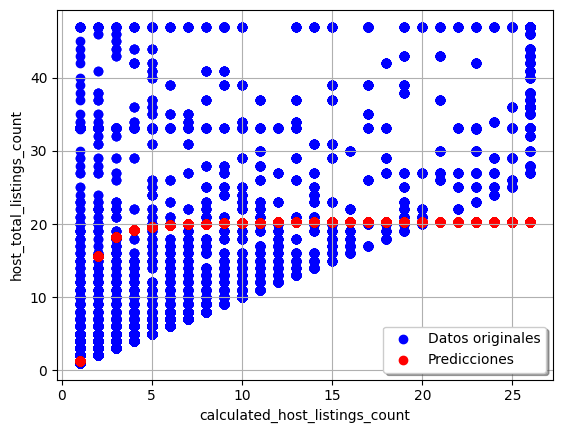

R² del modelo: 0.28827088717095517
R (correlación) del modelo: 0.5369086395011308


In [53]:
#MODELO 2
# Variables independientes y dependiente
x = df['calculated_host_listings_count'].values
y = df['host_total_listings_count'].values

# Definimos la función correctamente
def func2(x, a, b, c):
    return (a*x**2 + b) / (c*x**2)

# Ajustamos los parámetros de la función
parametros2, covs2 = curve_fit(func2, x, y)

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros2)

# Realizamos las predicciones
y_pred2 = func2(x, *parametros2)
print("Primeras 10 predicciones:", y_pred2[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred2, color='red', label="Predicciones")
plt.xlabel('calculated_host_listings_count')
plt.ylabel('host_total_listings_count')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación y correlación
R2_Modelo2 = r2_score(y, y_pred2)
R_Modelo2 = np.sqrt(abs(R2_Modelo2))  # usamos abs por si R² es negativo

print("R² del modelo:", R2_Modelo2)
print("R (correlación) del modelo:", R_Modelo2)

Bloque 4 'accommodates'

In [78]:
# Correlación de la variable objetivo con todas las numéricas
corr_review = df[num_cols].corrwith(df['accommodates']).sort_values(ascending=False)
print('Variables con mayor correlación:', corr_review.head(25))
#print('Variables con menor correlación:', corr_review.tail())

Variables con mayor correlación: accommodates                                   1.000000
beds                                           0.758204
bedrooms                                       0.749513
bathrooms                                      0.496300
price                                          0.472515
estimated_revenue_l365d                        0.344652
calculated_host_listings_count_entire_homes    0.233130
estimated_occupancy_l365d                      0.140387
number_of_reviews_ltm                          0.131950
number_of_reviews_ly                           0.129536
host_acceptance_rate                           0.120259
number_of_reviews_l30d                         0.118454
host_response_rate                             0.115186
number_of_reviews                              0.112473
host_total_listings_count                      0.112457
reviews_per_month                              0.108051
host_listings_count                            0.100498
calculated_host

c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Primeras 10 predicciones: [4.99770382 5.06930274 2.38078339 3.49812937 2.82857762 3.75559485
 5.06930274 2.07528986 3.23389284 3.75559485]


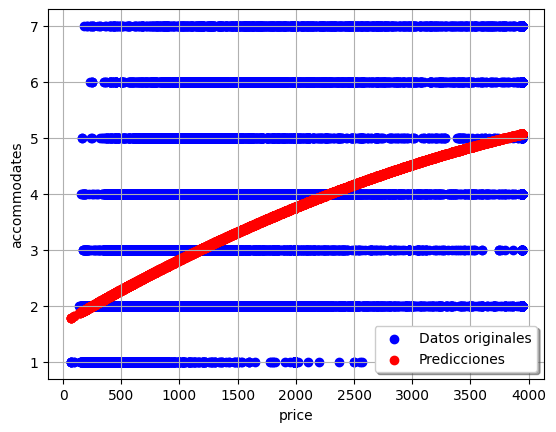

Coeficientes del modelo (a, b, c): [-9.10539939e-08  1.21340611e-03  1.70210177e+00]
R2 del modelo: 0.22669139703861252
R (correlación) del modelo: 0.4761211999466234


In [74]:
#MODELO 1
# Variables independientes y dependiente
x = df['price'].values
y = df['accommodates'].values

# Definimos la función cuadrática
def func1(x, a, b, c):
    return a*x**2 + b*x + c

# Ajustamos los parámetros de la función
parametros1, covs = curve_fit(func1, x, y)


# Realizamos las predicciones
y_pred1 = func1(x, *parametros1)

# Mostramos las primeras predicciones
print("Primeras 10 predicciones:", y_pred1[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred1, color='red', label="Predicciones")
plt.xlabel('price')
plt.ylabel('accommodates')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros1)

# Calculamos el coeficiente de determinación y correlación
R2_Modelo1 = r2_score(y, y_pred1)
R_Modelo1 = np.sqrt(R2_Modelo1)

print("R2 del modelo:", R2_Modelo1)
print("R (correlación) del modelo:", R_Modelo1)

Coeficientes del modelo (a, b, c): [ 194.96041915 -891.66007328   49.44084519]
Primeras 10 predicciones: [3.13151435 3.04070041 3.15727082 3.19826052 3.19826052 3.13151435
 3.1921661  3.16702505 3.14397657 3.05269504]


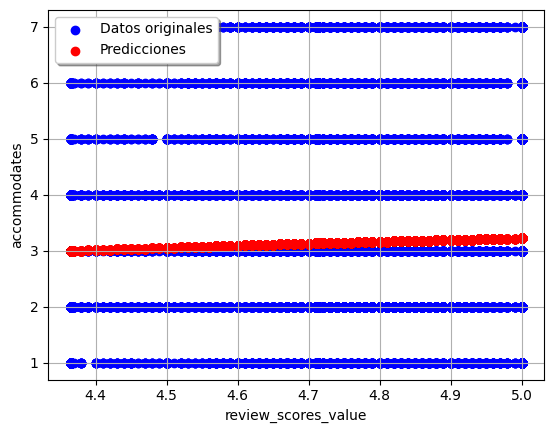

R² del modelo: 0.001413396369129627
R (correlación) del modelo: 0.037595164172132926


In [86]:
#MODELO 2
# Variables independientes y dependiente
x = df['review_scores_value'].values
y = df['accommodates'].values

# Definimos la función correctamente
def func2(x, a, b, c):
    return (a*x**2 + b) / (c*x**2)

# Ajustamos los parámetros de la función
parametros2, covs2 = curve_fit(func2, x, y)

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros2)

# Realizamos las predicciones
y_pred2 = func2(x, *parametros2)
print("Primeras 10 predicciones:", y_pred2[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred2, color='red', label="Predicciones")
plt.xlabel('review_scores_value')
plt.ylabel('accommodates')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación y correlación
R2_Modelo2 = r2_score(y, y_pred2)
R_Modelo2 = np.sqrt(abs(R2_Modelo2))  # usamos abs por si R² es negativo

print("R² del modelo:", R2_Modelo2)
print("R (correlación) del modelo:", R_Modelo2)

Bloque 5 'reviews_per_month'

In [89]:
# Correlación de la variable objetivo con todas las numéricas
corr_review = df[num_cols].corrwith(df['reviews_per_month']).sort_values(ascending=False)
print('Variables con mayor correlación:', corr_review.head())
#print('Variables con menor correlación:', corr_review.tail())

Variables con mayor correlación: reviews_per_month            1.000000
number_of_reviews_ltm        0.802304
estimated_occupancy_l365d    0.742481
number_of_reviews_ly         0.699449
number_of_reviews_l30d       0.646572
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Primeras 10 predicciones: [0.88712439 0.91254388 1.03537184 0.91254388 1.14970028 0.88712439
 2.65860259 1.39995078 1.19203975 0.88712439]


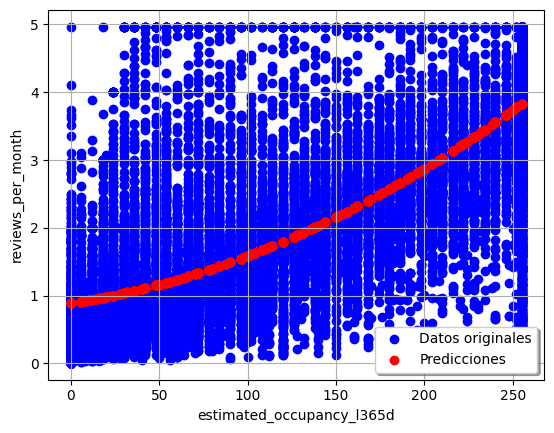

Coeficientes del modelo (a, b, c): [2.93749661e-05 4.06033267e-03 8.87124386e-01]
R2 del modelo: 0.5683479523859751
R (correlación) del modelo: 0.7538885543540074


In [88]:
#MODELO 1
# Variables independientes y dependiente
x = df['estimated_occupancy_l365d'].values
y = df['reviews_per_month'].values

# Definimos la función cuadrática
def func1(x, a, b, c):
    return a*x**2 + b*x + c

# Ajustamos los parámetros de la función
parametros1, covs = curve_fit(func1, x, y)


# Realizamos las predicciones
y_pred1 = func1(x, *parametros1)

# Mostramos las primeras predicciones
print("Primeras 10 predicciones:", y_pred1[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred1, color='red', label="Predicciones")
plt.xlabel('estimated_occupancy_l365d')
plt.ylabel('reviews_per_month')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros1)

# Calculamos el coeficiente de determinación y correlación
R2_Modelo1 = r2_score(y, y_pred1)
R_Modelo1 = np.sqrt(R2_Modelo1)

print("R2 del modelo:", R2_Modelo1)
print("R (correlación) del modelo:", R_Modelo1)

Coeficientes del modelo (a, b, c): [ 9996.38559497 -4125.06760078  3027.57358668]
Primeras 10 predicciones: [1.57599706 1.65644909 1.93928168 0.68325542 1.41596871 1.57599706
 1.72645513 1.45956984 1.93928168 1.93928168]


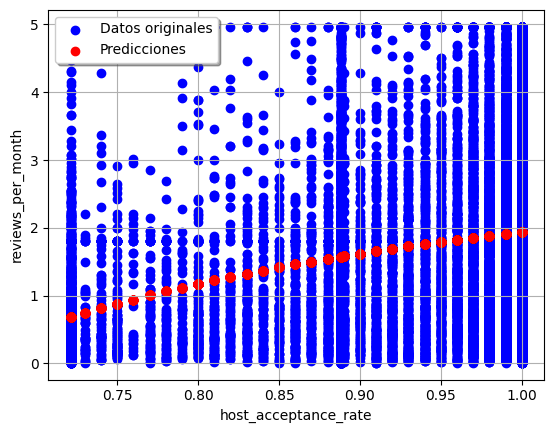

R² del modelo: 0.08880367608016915
R (correlación) del modelo: 0.2979994565098553


In [87]:
#MODELO 2
# Variables independientes y dependiente
x = df['host_acceptance_rate'].values
y = df['reviews_per_month'].values

# Definimos la función correctamente
def func2(x, a, b, c):
    return (a*x**2 + b) / (c*x**2)

# Ajustamos los parámetros de la función
parametros2, covs2 = curve_fit(func2, x, y)

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros2)

# Realizamos las predicciones
y_pred2 = func2(x, *parametros2)
print("Primeras 10 predicciones:", y_pred2[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred2, color='red', label="Predicciones")
plt.xlabel('host_acceptance_rate')
plt.ylabel('reviews_per_month')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación y correlación
R2_Modelo2 = r2_score(y, y_pred2)
R_Modelo2 = np.sqrt(abs(R2_Modelo2))  # usamos abs por si R² es negativo

print("R² del modelo:", R2_Modelo2)
print("R (correlación) del modelo:", R_Modelo2)

Bloque 6 'price'

In [97]:
# Correlación de la variable objetivo con todas las numéricas
corr_review = df[num_cols].corrwith(df['price']).sort_values(ascending=False)
print('Variables con mayor correlación:', corr_review.head())
#print('Variables con menor correlación:', corr_review.tail())

Variables con mayor correlación: price           1.000000
bedrooms        0.487583
accommodates    0.472515
bathrooms       0.447674
beds            0.427997
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Primeras 10 predicciones: [1143.9549708  1295.81386083 1156.01701238 1150.35256838 1188.81244135
 1349.72003954 2382.80992772 1162.80684563 1231.92747993 1349.72003954]


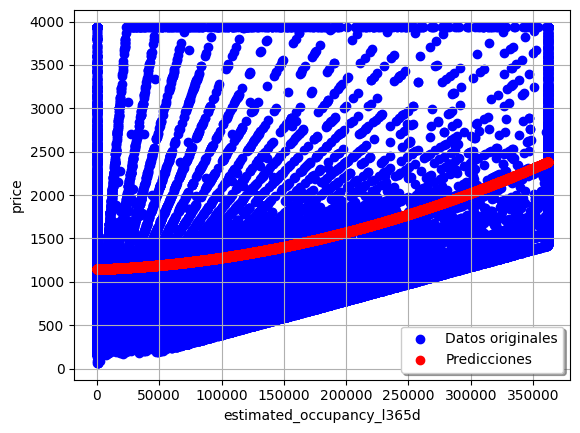

Coeficientes del modelo (a, b, c): [7.94698747e-09 5.47826187e-04 1.14395497e+03]
R2 del modelo: 0.15814946518872341
R (correlación) del modelo: 0.39768010408961046


In [ ]:
#MODELO 1
# Variables independientes y dependiente
x = df['estimated_revenue_l365d'].values
y = df['price'].values

# Definimos la función cuadrática
def func1(x, a, b, c):
    return a*x**2 + b*x + c

# Ajustamos los parámetros de la función
parametros1, covs = curve_fit(func1, x, y)


# Realizamos las predicciones
y_pred1 = func1(x, *parametros1)

# Mostramos las primeras predicciones
print("Primeras 10 predicciones:", y_pred1[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred1, color='red', label="Predicciones")
plt.xlabel('estimated_revenue_l365d')
plt.ylabel('price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros1)

# Calculamos el coeficiente de determinación y correlación
R2_Modelo1 = r2_score(y, y_pred1)
R_Modelo1 = np.sqrt(R2_Modelo1)

print("R2 del modelo:", R2_Modelo1)
print("R (correlación) del modelo:", R_Modelo1)

Coeficientes del modelo (a, b, c): [ 2.33310174e+02 -2.32869668e+03  9.41636735e-02]
Primeras 10 predicciones: [1381.03611768 1303.88174556 1434.97954597 1447.7085747  1456.06554096
 1381.03611768 1439.24864845 1422.01308761 1413.23395007 1293.58506525]


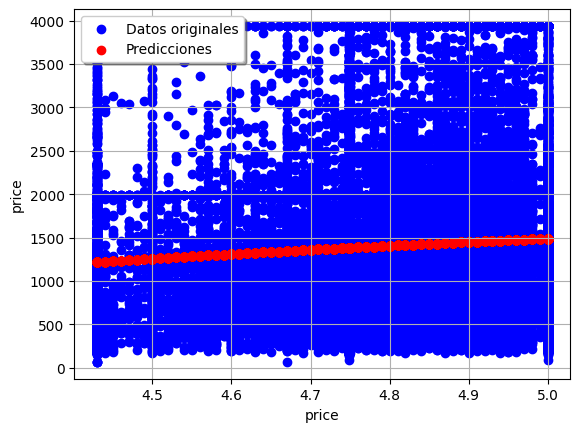

R² del modelo: 0.00729804885355112
R (correlación) del modelo: 0.08542861846917062


In [96]:
#MODELO 2
# Variables independientes y dependiente
x = df['review_scores_rating'].values
y = df['price'].values

# Definimos la función correctamente
def func2(x, a, b, c):
    return (a*x**2 + b) / (c*x**2)

# Ajustamos los parámetros de la función
parametros2, covs2 = curve_fit(func2, x, y)

# Mostramos los coeficientes ajustados
print("Coeficientes del modelo (a, b, c):", parametros2)

# Realizamos las predicciones
y_pred2 = func2(x, *parametros2)
print("Primeras 10 predicciones:", y_pred2[:10])

# Graficamos los datos originales y las predicciones
plt.scatter(x, y, color='blue', label="Datos originales")
plt.scatter(x, y_pred2, color='red', label="Predicciones")
plt.xlabel('price')
plt.ylabel('price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación y correlación
R2_Modelo2 = r2_score(y, y_pred2)
R_Modelo2 = np.sqrt(abs(R2_Modelo2))  # usamos abs por si R² es negativo

print("R² del modelo:", R2_Modelo2)
print("R (correlación) del modelo:", R_Modelo2)